2 sex - student's sex (binary: 'F' - female or 'M' - male)

3 age - student's age (numeric: from 15 to 22)

4 address - student's home address type (binary: 'U' - urban or 'R' - rural)

5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)

6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)

7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)

9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')

11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')

12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')

13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)

14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)

15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)

16 schoolsup - extra educational support (binary: yes or no)

17 famsup - family educational support (binary: yes or no)

18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)

19 activities - extra-curricular activities (binary: yes or no)

20 nursery - attended nursery school (binary: yes or no)

21 higher - wants to take higher education (binary: yes or no)

22 internet - Internet access at home (binary: yes or no)

23 romantic - with a romantic relationship (binary: yes or no)

24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)

25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)

26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)

27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)

28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)

29 health - current health status (numeric: from 1 - very bad to 5 - very good)

30 absences - number of school absences (numeric: from 0 to 93)

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [69]:
data = pd.read_csv('student-por.csv')
data.head()

,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,M,18,U,LE3,T,1,1,other,other,course,...,2,3,5,2,5,4,0,11,9,0
1,M,16,U,GT3,T,1,1,at_home,services,home,...,5,4,5,4,5,3,0,7,0,0
2,M,16,R,GT3,T,2,1,other,services,reputation,...,5,2,1,1,1,2,0,8,7,0
3,M,17,U,GT3,T,2,2,other,other,course,...,1,2,1,2,3,5,0,7,0,0
4,M,18,R,GT3,T,3,2,services,other,course,...,2,3,1,2,2,5,0,4,0,0


In [70]:
# some of these categories are shared so they have to be differentiated
# for the sake of the dummies made later on
def func(x):
    if x == 'teacher':
        return 'Mjob teacher'
    elif x == 'health':
        return 'Mjob health'
    elif x == 'services':
        return 'Mjob civil services'
    elif x == 'at_home':
        return 'Mjob at home'
    elif x == 'other':
        return 'Mjob other'
    
data['Mjob'] = data['Mjob'].apply(func)

In [71]:
def func(x):
    if x == 'teacher':
        return 'Fjob teacher'
    elif x == 'health':
        return 'Fjob health'
    elif x == 'services':
        return 'Fjob civil services'
    elif x == 'at_home':
        return 'Fjob at home'
    elif x == 'other':
        return 'Fjob other'
    
data['Fjob'] = data['Fjob'].apply(func)

In [72]:
def func(x):
    if x == 'other':
        return 'reason other'

data['reason'] = data['reason'].apply(func)

In [73]:
def func(x):
    if x == 'other':
        return 'guardian other'
    
data['guardian'] = data['guardian'].apply(func)

In [74]:
def func(x):
    if x == 'M':
        return 0
    else:
        return 1
data['sex'] = data['sex'].apply(func)

In [75]:
def func(x):
    if x == 'U':
        return 0
    else:
        return 1
data['address'] = data['address'].apply(func)

In [76]:
def func(x):
    if x == 'LE3':
        return 0
    else:
        return 1
data['famsize'] = data['famsize'].apply(func)

In [77]:
def func(x):
    if x == 'Pstatus':
        return 0
    else:
        return 1
data['Pstatus'] = data['Pstatus'].apply(func)

In [78]:
def func(x):
    if x == 'no':
        return 0
    else:
        return 1
    
data['schoolsup'] = data['schoolsup'].apply(func)
data['famsup'] = data['famsup'].apply(func)
data['paid'] = data['paid'].apply(func)
data['activities'] = data['activities'].apply(func)
data['nursery'] = data['nursery'].apply(func)
data['higher'] = data['higher'].apply(func)
data['internet'] = data['internet'].apply(func)
data['romantic'] = data['romantic'].apply(func)

In [79]:
# making dummies for categorical variables

Mjob  = pd.get_dummies(data['Mjob'],drop_first=True)
Fjob = pd.get_dummies(data['Fjob'],drop_first=True)
reason = pd.get_dummies(data['reason'],drop_first=True)
guardian = pd.get_dummies(data['guardian'],drop_first=True)

In [80]:
# dropping the columns which have been converted into dummies

data.drop(['Mjob','Fjob','reason',
          'guardian'],axis=1, inplace=True)

In [81]:
data = data.join((Mjob,Fjob,reason,guardian))

,sex,age,address,famsize,Pstatus,Medu,Fedu,traveltime,studytime,failures,...,G2,G3,Mjob civil services,Mjob health,Mjob other,Mjob teacher,Fjob civil services,Fjob health,Fjob other,Fjob teacher
0,0,18,0,0,1,1,1,1,1,2,...,9,0,0,0,1,0,0,0,1,0
1,0,16,0,1,1,1,1,2,2,0,...,0,0,0,0,0,0,1,0,0,0
2,0,16,1,1,1,2,1,2,2,0,...,7,0,0,0,1,0,1,0,0,0
3,0,17,0,1,1,2,2,1,1,1,...,0,0,0,0,1,0,0,0,1,0
4,0,18,1,1,1,3,2,1,1,1,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,1,17,1,1,1,1,1,3,1,1,...,8,9,0,0,1,0,1,0,0,0
645,1,17,1,1,1,1,2,1,1,0,...,8,9,0,0,1,0,0,0,1,0
646,1,19,1,1,1,1,1,2,2,1,...,8,9,0,0,0,0,0,0,1,0
647,1,17,1,1,1,3,1,1,2,0,...,9,9,0,0,0,0,0,0,1,0


In [82]:
# this regression will only be interested in the final grade so the others
# are omitted

data.drop(["G1"],axis=1,inplace=True)
data.drop(["G2"],axis=1,inplace=True)

In [ ]:
data.head()

In [83]:
data.to_csv("student_data.csv")

In [84]:
X = data.drop(['G3'],axis=1)
y = data['G3']

In [85]:
import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.330
Model:                            OLS   Adj. R-squared:                  0.295
Method:                 Least Squares   F-statistic:                     9.482
Date:                Fri, 26 Nov 2021   Prob (F-statistic):           4.27e-36
Time:                        17:14:36   Log-Likelihood:                -1551.5
No. Observations:                 649   AIC:                             3169.
Df Residuals:                     616   BIC:                             3317.
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
sex                     0.5088    

If we adopt the 10% arbitrary cut off, then we can see above that many of the estimators are not statistically significant, with the worst p-value of 98.2% possessed by 'traveltime'. This means that there is a 98.2% chance that the estimator of traveltime is equal to zero. It being irrelevant, it will be omitted in the following regressions. We will iteratively remove estimators until they all have p-values which meet the 10% threshold, the final results being below.

In [102]:
X = data.drop(['G3','traveltime','Walc','absences','Medu','Fjob other','goout','age','Mjob other', 
               'Mjob other','T','LE3','Fjob teacher','M'],axis=1)
y = data['G3']

X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     G3   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.262
Method:                 Least Squares   F-statistic:                     18.69
Date:                Mon, 01 Nov 2021   Prob (F-statistic):           4.04e-37
Time:                        18:16:57   Log-Likelihood:                -1576.3
No. Observations:                 649   AIC:                             3181.
Df Residuals:                     635   BIC:                             3243.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.8907    

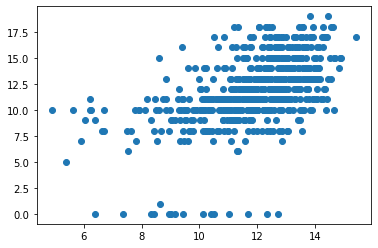

In [115]:
import statsmodels.api as sm
ypred = results.predict(X)
plt.scatter(ypred,y)

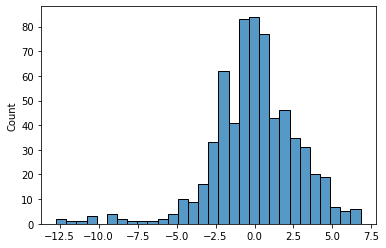

In [118]:
sns.histplot((y-ypred),bins=30);

## Results

- For every categorical increase in their Father's education level, a student's grade increases by 0.3 points*

- For every categorical increase in their study time, a student's grade increases by 0.7 points*

- For every increase in the number of previously failed classes, a student's grade decreases by 1.7 points*

- For every unit increase in the quality of the student's family relationship, a student's grade increases by 0.2 points*

- For every unit increase in their free time, the student's grade decreases by 0.2 points*

- For every categorical increase in workday alcohol consumption, the student's grade decreases by 0.4 points*

- For every categorical improvement in health, the student's grade decreases by 0.2 points*

- Urban students grades are 0.7 points higher*

- Students with a civil servant as a Father have grades 0.58 points higher*

- Students with a Father who works in healthcare have grades 1.3 points higher*

- Students with a Father who works as a teacher have grades 0.9 points higher*

- Students with a civil servant as a Mother have grades -0.63 points higher*

- Students with a Father who works in healthcare have grades -1 points higher*

*= on average when all other variables are unchanged

## Discussion

It is perhaps surprising that better health has a negative relationship with grades. This may indicate that there is some trade-off between giving time spent working and time spent caring for ones health.

Despite the large number of variables, this model does not have a large predictive power as the R^2 is only 0.277, meaning that only 28% of variation in the students' grades can be explained by the variables in the model. As such, the relationships we identified above - although they are statistically signficiant and so we can be confident the relationships *are* there - all have weak relationships with grade with the majority not increasing or decreasing grade by more than one of the twenty points.